# Importation des librairies

In [1094]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import binomtest
from bootstrapped import bootstrap as bs
from statsmodels.stats.proportion import binom_test
from bootstrapped import stats_functions as bs_stats
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import norm, levene, shapiro, wilcoxon, kruskal,chi2_contingency, fisher_exact
# Utiliser le style ggplot pour les graphiques
plt.style.use('ggplot')

# A - Importation et traitement des données 

In [1095]:
# A - Importation des données
df = pd.read_csv("D:/INSSEDS/datasets/Student_Depression.csv")
df

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [1096]:
# A-1 - Exploration des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   sexe                                   27901 non-null  object 
 2   age                                    27901 non-null  float64
 3   ville                                  27901 non-null  object 
 4   profession                             27901 non-null  object 
 5   pression_academique                    27901 non-null  float64
 6   pression_liee_au_travail               27901 non-null  float64
 7   moyenne_notes                          27901 non-null  float64
 8   satisfaction_etudes                    27901 non-null  float64
 9    satisfaction_travail                  27901 non-null  float64
 10  duree_sommeil                          27901 non-null  object 
 11  ha

In [1097]:
df.describe()

,id,age,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,nombre_heure_travail_etude,stress_financier,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [1098]:
# A-2 - RECODAGE DES VARIABLES
df['id'] = df['id'].astype(str)
df['sexe'] = df['sexe'].replace({0: 'Femme', 1: 'Homme'}).astype('category')
df['age'] = df['age'].astype(int)
df['ville'] = df['ville'].astype('category')
df['profession'] = df['profession'].astype('category')
df['duree_sommeil'] = df['duree_sommeil'].astype('category')
df['habitudes_alimentaires'] = df['habitudes_alimentaires'].astype('category')
df['diplome_suivi'] = df['diplome_suivi'].astype('category')
df['pensees_suicidaire'] = df['pensees_suicidaire'].replace({'No': 'Non', 'Yes': 'Oui'})
df['antecedants_familiaux_maladie_mentale'] = df['antecedants_familiaux_maladie_mentale'].replace({0: 'Non', 1: 'Oui'}).astype('category')
df['depression'] = df['depression'].replace({0: 'Non', 1: 'Oui'}).astype('category')

In [1099]:
df.describe()

,age,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,nombre_heure_travail_etude,stress_financier
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


In [1100]:
# A-4 - Traitement des valeurs manquantes
# Afficher les individus avec des valeurs manquantes
df[df.isnull().any(axis=1)]

,id,sexe,age,ville,profession,pression_academique,pression_liee_au_travail,moyenne_notes,satisfaction_etudes,satisfaction_travail,duree_sommeil,habitudes_alimentaires,diplome_suivi,pensees_suicidaire,nombre_heure_travail_etude,stress_financier,antecedants_familiaux_maladie_mentale,depression
4458,22377,Female,32,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,Non,12.0,NaN,No,Oui
13596,68910,Male,29,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,Non,12.0,NaN,Yes,Non
19266,97610,Female,20,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,Non,9.0,NaN,Yes,Non


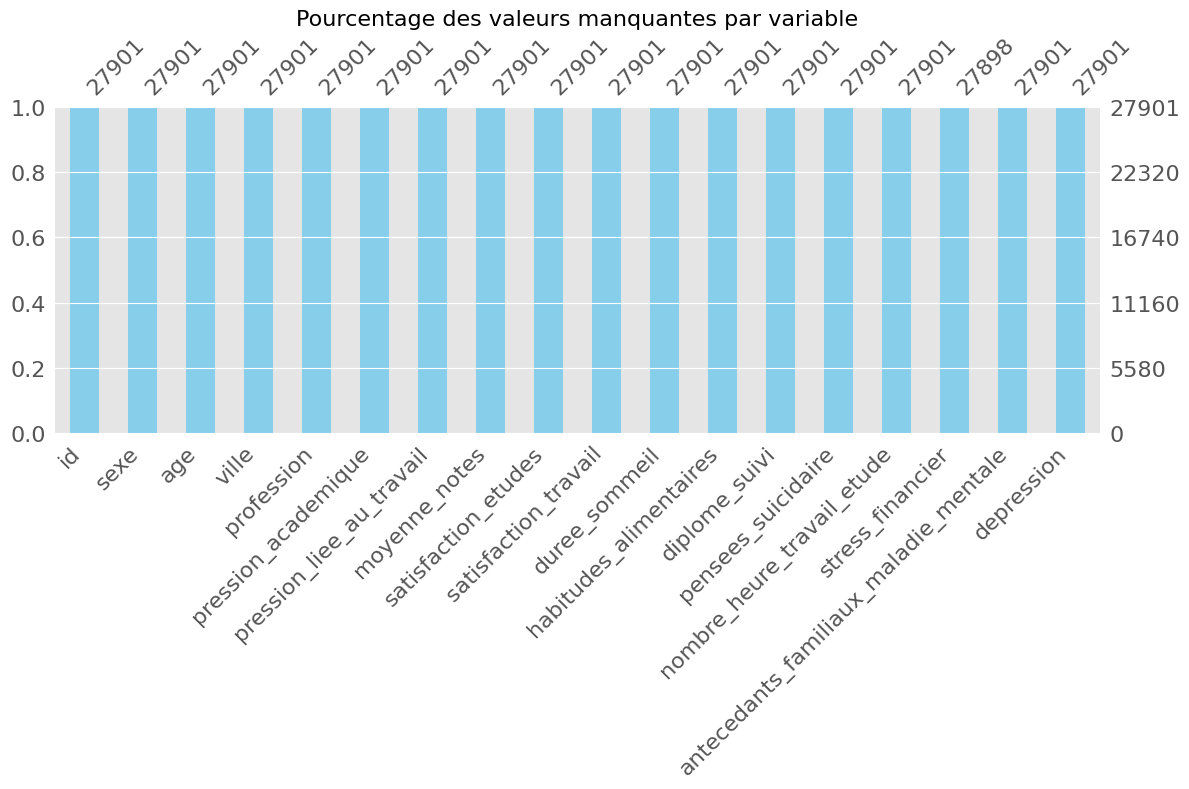

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\1763368941.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


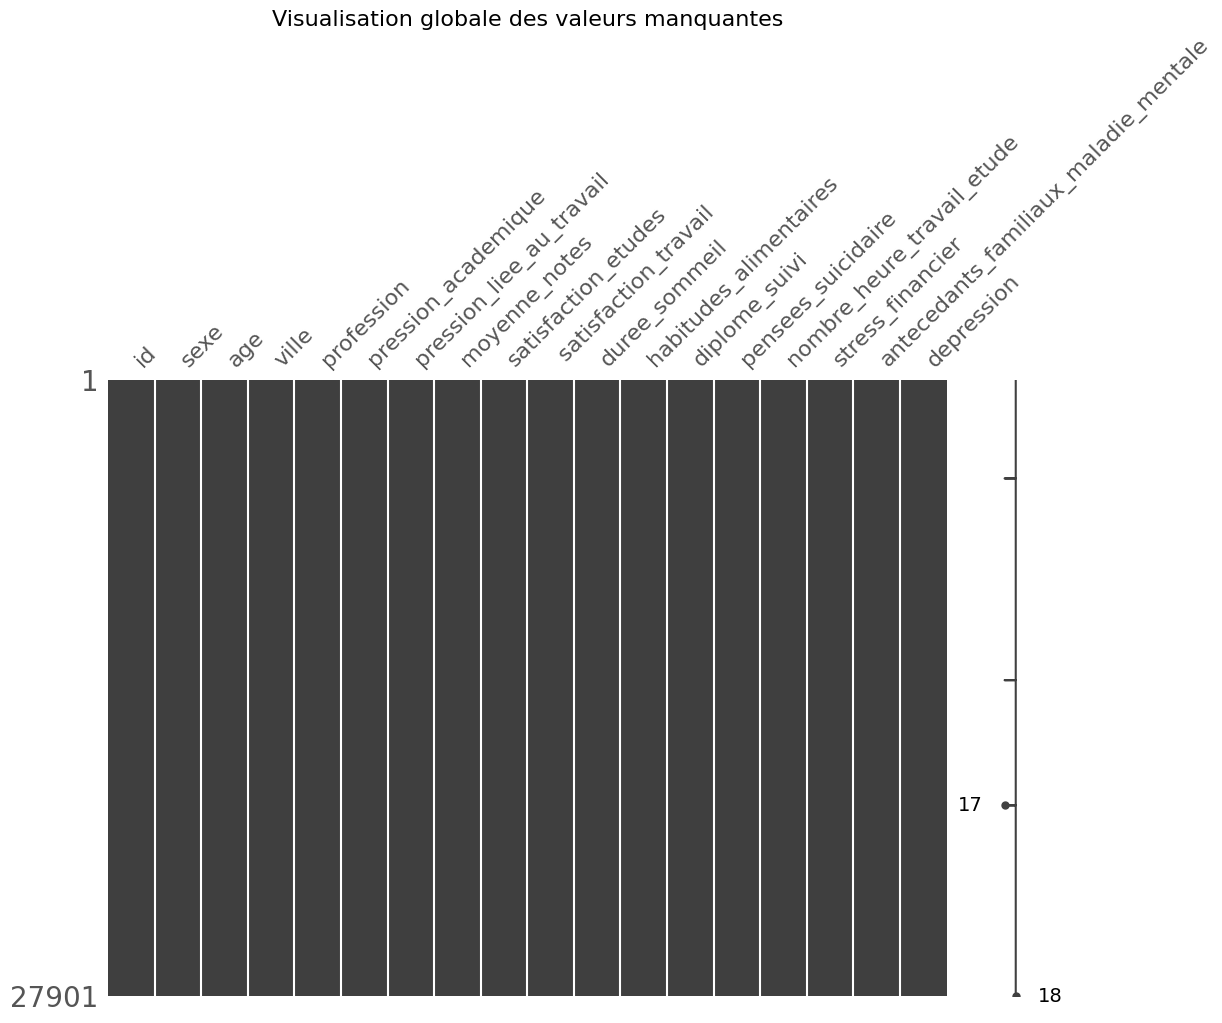

In [1101]:
# Visualiser le pourcentage de valeurs manquantes pour chaque colonne
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage des valeurs manquantes par variable', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs manquantes', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [1102]:
# Supprimer les valeurs manquantes
df = df.dropna()

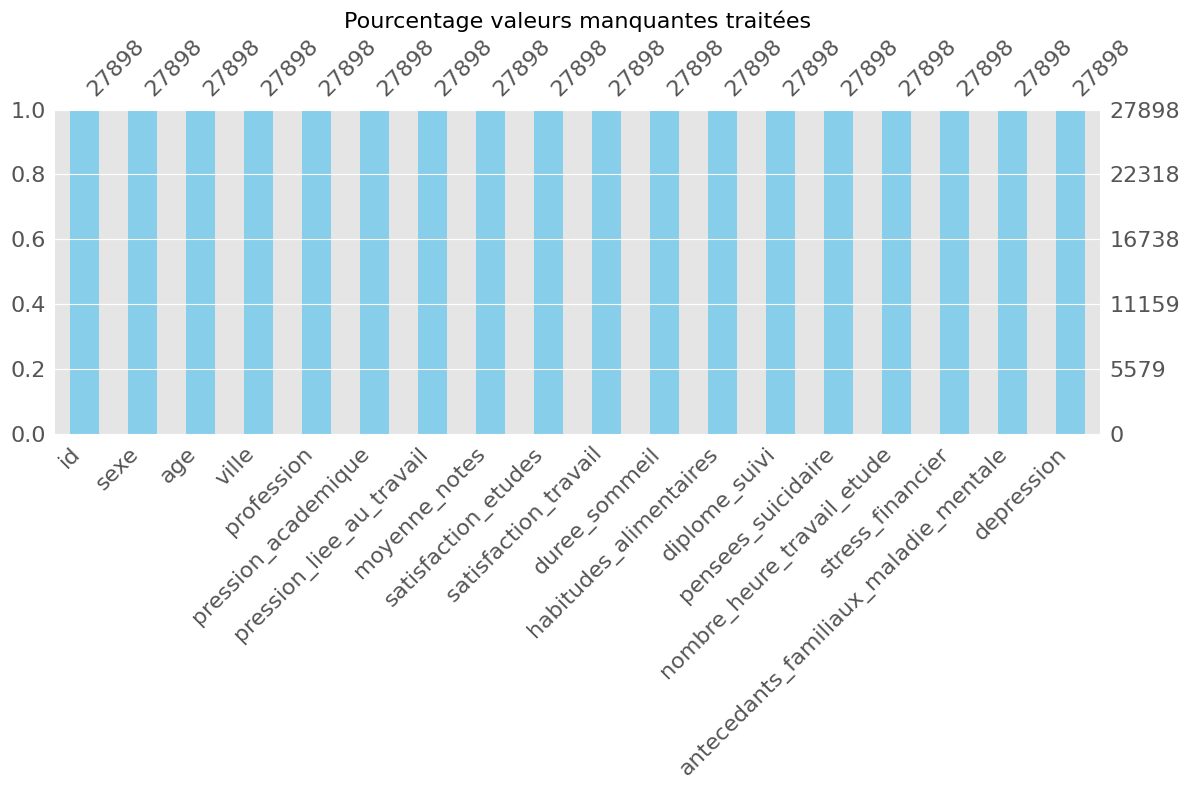

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\464337226.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


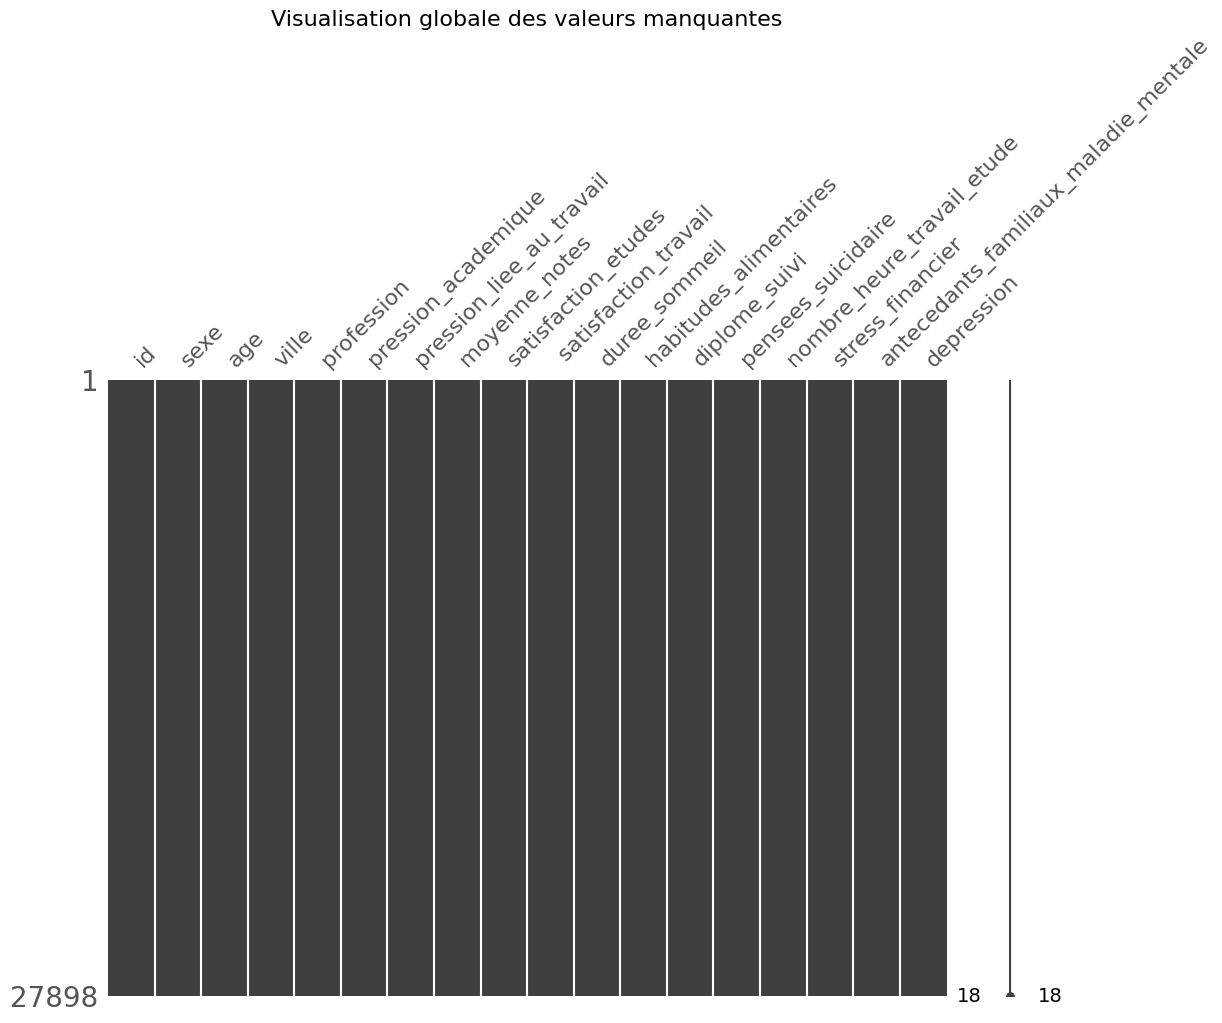

In [1103]:
# Visualiser le pourcentage de valeurs manquantes pour chaque colonne
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage valeurs manquantes traitées', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs manquantes', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()

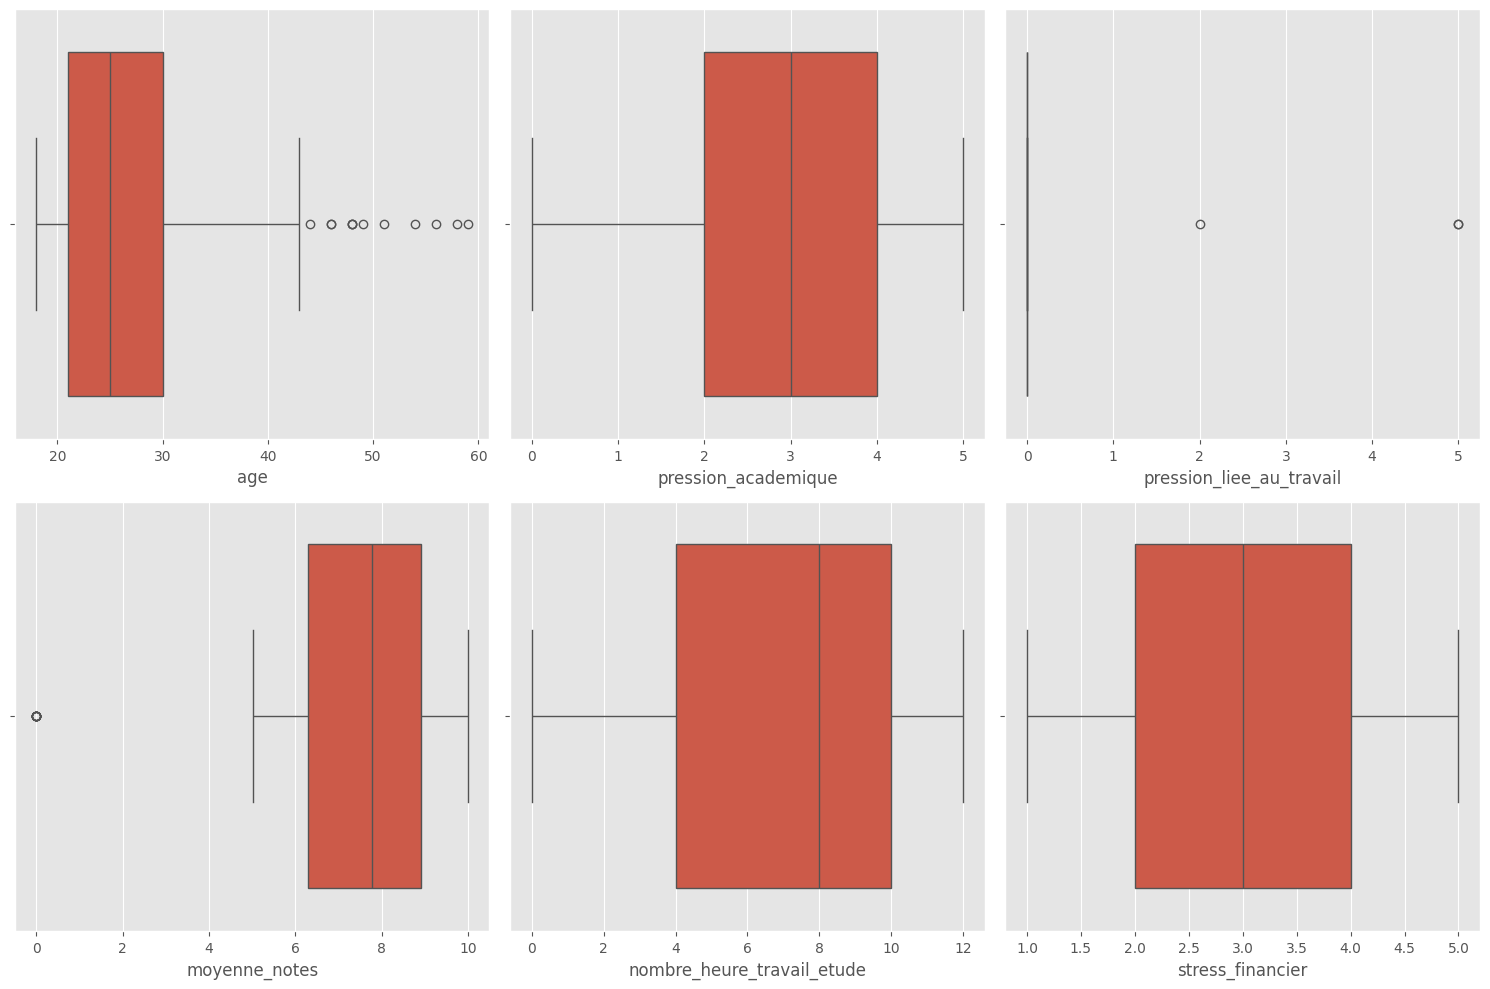

In [1104]:
# A-5 - Traitement des valeurs aberrantes ou extrêmes
# Boxplot pour analyser les valeurs extrêmes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=df, x='age', ax=axes[0, 0])
sns.boxplot(data=df, x='pression_academique', ax=axes[0, 1])
sns.boxplot(data=df, x='pression_liee_au_travail', ax=axes[0, 2])
sns.boxplot(data=df, x='moyenne_notes', ax=axes[1, 0])
sns.boxplot(data=df, x='nombre_heure_travail_etude', ax=axes[1, 1])
sns.boxplot(data=df, x='stress_financier', ax=axes[1, 2])

plt.tight_layout()
plt.show()

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\1049492305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\1049492305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moyenne_notes'] = winsorize(df['moyenne_notes'], limits=[0.05, 0.05])


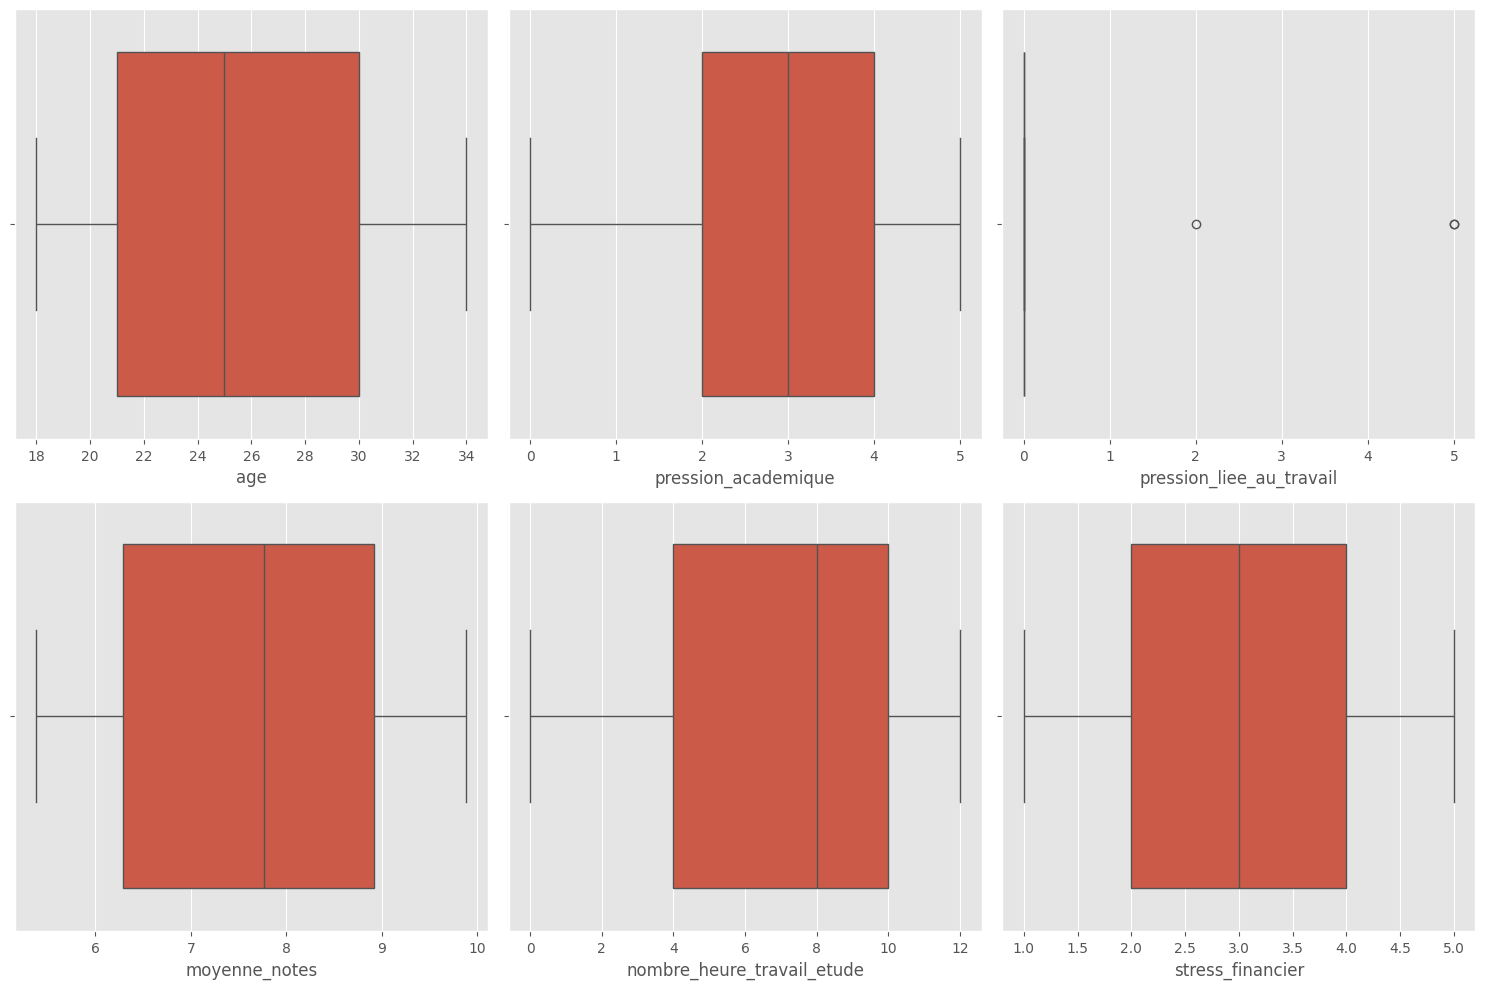

In [1105]:
# Winsorisation des valeurs extrêmes (utilisation de `scipy.stats.mstats.winsorize`)
from scipy.stats.mstats import winsorize

df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
df['moyenne_notes'] = winsorize(df['moyenne_notes'], limits=[0.05, 0.05])

# Boxplot après Winsorisation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=df, x='age', ax=axes[0, 0])
sns.boxplot(data=df, x='pression_academique', ax=axes[0, 1])
sns.boxplot(data=df, x='pression_liee_au_travail', ax=axes[0, 2])
sns.boxplot(data=df, x='moyenne_notes', ax=axes[1, 0])
sns.boxplot(data=df, x='nombre_heure_travail_etude', ax=axes[1, 1])
sns.boxplot(data=df, x='stress_financier', ax=axes[1, 2])

plt.tight_layout()
plt.show()

# B - Statistiques inférentielles

# B-1 - Intervalle de confiance pour la proportion d'étudiants ayant déjà eu des pensées suicidaires


In [1106]:
# Recalcul des effectifs
table_suicidaires = df['pensees_suicidaire'].value_counts()
n_Yes = table_suicidaires.get('Oui', 0)
n_No = table_suicidaires.get('Non', 0)
n_total = table_suicidaires.sum()

# Test binomial (p-value)
binom_result = binomtest(n_Yes, n_total, alternative='two-sided')

# Intervalle de confiance
conf_int = proportion_confint(n_Yes, n_total, alpha=0.05, method='beta')

# Résultats
print(f"Nombre d'étudiants ayant répondu 'Oui' : {n_Yes}")
print(f"Nombre d'étudiants ayant répondu 'Non' : {n_No}")
print(f"Nombre total d'étudiants : {n_total}")
print(f"Intervalle de confiance à 95 % : {conf_int}")


Nombre d'étudiants ayant répondu 'Oui' : 17656
Nombre d'étudiants ayant répondu 'Non' : 10242
Nombre total d'étudiants : 27898
Intervalle de confiance à 95 % : (0.6271891513235889, 0.6385369809304278)


# B-2-1 Estimation de la moyenne et de la médiane des heures de travail pour les étudiants souffrant de dépression

In [1107]:
depressed_students = df[df['depression'] == 'Oui']
# Test de normalité (Shapiro-Wilk)
shapiro_result = stats.shapiro(depressed_students['nombre_heure_travail_etude'].dropna())
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.4f}")

Shapiro-Wilk p-value: 0.0000


c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16335.
  res = hypotest_fun_out(*samples, **kwds)


In [1108]:
# Estimation de la moyenne avec bootstrap
from sklearn.utils import resample

boot_means = [np.mean(resample(depressed_students['nombre_heure_travail_etude'].dropna())) for _ in range(1000)]
mean_ci = np.percentile(boot_means, [2.5, 97.5])
print(f"Intervalle de confiance pour la moyenne : ({mean_ci[0]:.2f}, {mean_ci[1]:.2f})")

Intervalle de confiance pour la moyenne : (7.76, 7.86)


In [1109]:
# Estimation de la médiane avec bootstrap
boot_medians = [np.median(resample(depressed_students['nombre_heure_travail_etude'].dropna())) for _ in range(1000)]
median_ci = np.percentile(boot_medians, [2.5, 97.5])
print(f"Intervalle de confiance pour la médiane : ({median_ci[0]:.2f}, {median_ci[1]:.2f})")

Intervalle de confiance pour la médiane : (9.00, 9.00)


# B-2-2 Comparaison du stress financier selon la dépression

#Test graphique

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\552347202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depression', y='stress_financier', data=df, palette='Set2')


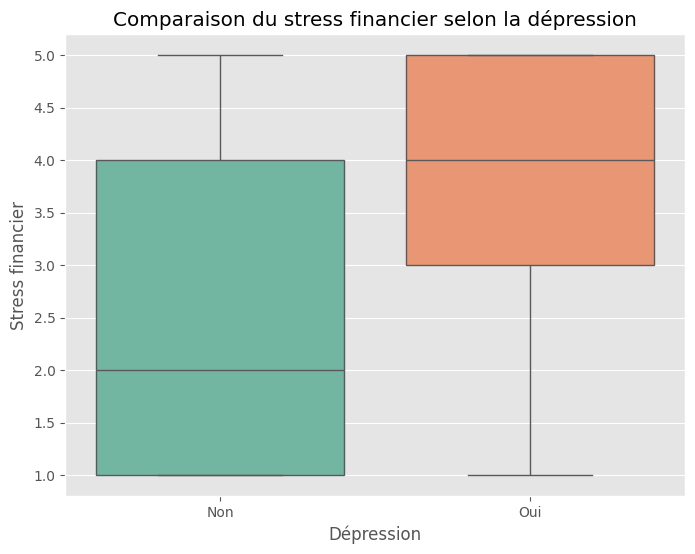

In [1110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='stress_financier', data=df, palette='Set2')
plt.title("Comparaison du stress financier selon la dépression")
plt.xlabel("Dépression")
plt.ylabel("Stress financier")
plt.show()

#2 - Test de Shapiro-Wilkerson

In [1111]:
non_depressed_students = df[df['depression'] == 'Non']
# Test de normalité (Shapiro-Wilk)
shapiro_result_ = stats.shapiro(non_depressed_students['stress_financier'].dropna())
print(f"Shapiro-Wilk p-value: {shapiro_result_.pvalue:.4f}")

Shapiro-Wilk p-value: 0.0000


c:\Users\awx1347475\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11563.
  res = hypotest_fun_out(*samples, **kwds)


In [1112]:
# 1- Test de Shapiro-Wilk pour la normalité (sur un échantillon de 5000)
sample_data = depressed_students['stress_financier'].sample(5000, random_state=42)
stat, p_value = shapiro(sample_data)
print(f"Shapiro-Wilk Test for Depressed Students: Stat={stat}, p-value={p_value}")

sample_data_nond = non_depressed_students['stress_financier'].sample(5000, random_state=42)
stat, p_value = shapiro(sample_data_nond)
print(f"Shapiro-Wilk Test for Non-Depressed Students: Stat={stat}, p-value={p_value}")



Shapiro-Wilk Test for Depressed Students: Stat=0.8594329200905046, p-value=4.111536043485778e-55
Shapiro-Wilk Test for Non-Depressed Students: Stat=0.8732106538728754, p-value=2.7448968334840803e-53


#Estimation de la moyenne et de la médianne par bootstrap

In [1113]:
# Estimation de la moyenne via Bootstrap
boot_result_mean_dpr = bs.bootstrap(np.array(depressed_students['stress_financier']), stat_func=bs_stats.mean)
boot_result_mean_nond = bs.bootstrap(np.array(non_depressed_students['stress_financier']), stat_func=bs_stats.mean)

print(f"Bootstrap Mean for Depressed Students: {boot_result_mean_dpr}")
print(f"Bootstrap Mean for Non-Depressed Students: {boot_result_mean_nond}")


Bootstrap Mean for Depressed Students: 3.579553106825834    (3.5594123048668505, 3.5997566574839306)
Bootstrap Mean for Non-Depressed Students: 2.5187235146588254    (2.493814321542852, 2.542679235492519)


In [1114]:
# Estimation de la médiane via Bootstrap
boot_result_median_dpr = bs.bootstrap(np.array(depressed_students['stress_financier']), stat_func=bs_stats.median)
boot_result_median_nond = bs.bootstrap(np.array(non_depressed_students['stress_financier']), stat_func=bs_stats.median)

print(f"Bootstrap Median for Depressed Students: {boot_result_median_dpr}")
print(f"Bootstrap Median for Non-Depressed Students: {boot_result_median_nond}")

Bootstrap Median for Depressed Students: 4.0    (4.0, 4.0)
Bootstrap Median for Non-Depressed Students: 2.0    (2.0, 2.0)


# B-3-1 La satisfaction des études diffère-t-elle significativement entre les étudiants souffrant de dépression et ceux qui n'en souffrent pas ?

#Créer un tableau de contingence pour la satisfaction des études en fonction de la dépression

In [1115]:
table_satisfaction = pd.crosstab(df['satisfaction_etudes'], df['depression'])

# Calculer les fréquences (proportions) pour chaque cellule du tableau
table_frequencies = table_satisfaction / table_satisfaction.sum().sum()

# Combiner les effectifs et les fréquences dans un seul tableau
result_table = pd.concat([table_satisfaction, table_frequencies], axis=1, keys=['Effectifs', 'Frequencies'])

# Afficher le résultat
print(result_table)

                    Effectifs       Frequencies          
depression                Non   Oui         Non       Oui
satisfaction_etudes                                      
0.0                         4     6    0.000143  0.000215
1.0                      1593  3856    0.057101  0.138218
2.0                      2070  3768    0.074199  0.135063
3.0                      2467  3353    0.088429  0.120188
4.0                      3095  3264    0.110940  0.116998
5.0                      2334  2088    0.083662  0.074844


#1ere étape : comparer graphiquement les deux sous-population

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\1378545865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depression', y='satisfaction_etudes', data=df, palette='Set1')


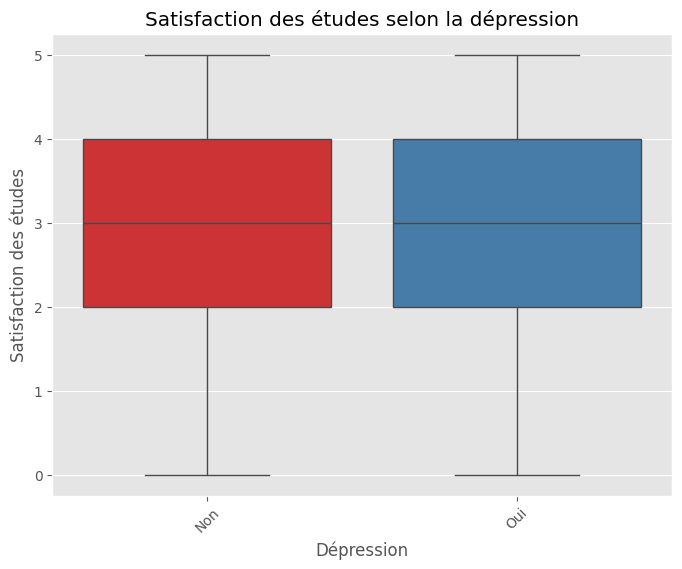

In [1116]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='depression', y='satisfaction_etudes', data=df, palette='Set1')
plt.title("Satisfaction des études selon la dépression")
plt.xlabel("Dépression")
plt.ylabel("Satisfaction des études")
plt.xticks(rotation=45)
plt.show()

#2eme étape : estimer les statistiques de base (mean, quantile, sd) par ss pop

In [1117]:
# Estimer la moyenne par groupe de 'depression'
mean_by_group = df.groupby('depression')['satisfaction_etudes'].mean()

# Estimer l'écart-type (sd) par groupe de 'depression'
sd_by_group = df.groupby('depression')['satisfaction_etudes'].std()

# Estimer les quantiles (par défaut, tous les quantiles de 0 à 1) par groupe de 'depression'
quantiles_by_group = df.groupby('depression')['satisfaction_etudes'].quantile([0.25, 0.5, 0.75])

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\2863691548.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_group = df.groupby('depression')['satisfaction_etudes'].mean()
C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\2863691548.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sd_by_group = df.groupby('depression')['satisfaction_etudes'].std()
C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\2863691548.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

In [1118]:
# Afficher les résultats
print("Moyenne par groupe :")
mean_by_group

Moyenne par groupe :


depression
Non    3.215774
Oui    2.751576
Name: satisfaction_etudes, dtype: float64

In [1119]:
print("\nÉcart-type par groupe :")
print(sd_by_group)


Écart-type par groupe :
depression
Non    1.327351
Oui    1.351930
Name: satisfaction_etudes, dtype: float64


In [1120]:
print("\nQuantiles (0.25, 0.5, 0.75) par groupe :")
print(quantiles_by_group)


Quantiles (0.25, 0.5, 0.75) par groupe :
depression      
Non         0.25    2.0
            0.50    3.0
            0.75    4.0
Oui         0.25    2.0
            0.50    3.0
            0.75    4.0
Name: satisfaction_etudes, dtype: float64


#3eme étape : tester la normalité des données dans chaque sous population

#𝐻0 ∶ la distribution suit une loi normale

#𝐻1 ∶ la distributionne suit pas une loi normale

In [1121]:
# Assurer la reproductibilité de l'échantillonnage
np.random.seed(123)

# Exemple de DataFrame df (supposé déjà créé)

# Échantillonner 5000 observations pour chaque groupe
sample_non = df[df['depression'] == 'Non']['satisfaction_etudes'].sample(n=5000, random_state=123)
sample_oui = df[df['depression'] == 'Oui']['satisfaction_etudes'].sample(n=5000, random_state=123)


In [1122]:
# Combiner les échantillons
df_sampled = pd.concat([sample_non, sample_oui])

# Test de normalité de Shapiro-Wilk pour chaque groupe
shapiro_non = stats.shapiro(sample_non)
shapiro_oui = stats.shapiro(sample_oui)

# Afficher les résultats du test de Shapiro-Wilk
print(f"Test de Shapiro-Wilk pour le groupe 'Non' : Statistique = {shapiro_non.statistic}, p-value = {shapiro_non.pvalue}")
print(f"Test de Shapiro-Wilk pour le groupe 'Oui' : Statistique = {shapiro_oui.statistic}, p-value = {shapiro_oui.pvalue}")

Test de Shapiro-Wilk pour le groupe 'Non' : Statistique = 0.8974335636522691, p-value = 1.2272083055748331e-49
Test de Shapiro-Wilk pour le groupe 'Oui' : Statistique = 0.8897834387193737, p-value = 7.334184980182074e-51


#4eme étape : tester l’égalité des variances

#𝐻0 ∶ 𝜎12 = 𝜎22

#𝐻1 ∶ 𝜎12 ≠ 𝜎22

In [1123]:
# Supposons que les colonnes 'satisfaction_etudes' et 'depression' existent dans df
# On effectue un test F pour comparer les variances
grouped_data = [df[df['depression'] == group]['satisfaction_etudes'] for group in df['depression'].unique()]

# F test (variance test) 
f_stat, p_value = stats.levene(*grouped_data)

# Affichage des résultats
print(f'F statistic: {f_stat}')
print(f'P-value: {p_value}')

F statistic: 13.099796728996042
P-value: 0.00029585003805080953


#5eme étape : tester l’égalité des moyennes

#𝐻0 ∶ 𝜇1 = 𝜇2

#𝐻1 ∶ 𝜇1 ≠ 𝜇2

In [1124]:
# Séparer les données en fonction de la dépression
group_0 = df[df['depression'] == 0]['satisfaction_etudes']
group_1 = df[df['depression'] == 1]['satisfaction_etudes']

# Tester si les distributions sont différentes
stat, p_value = wilcoxon(group_0, group_1)

# Afficher la p-value
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print(f"La satisfaction des études diffère significativement entre les étudiants souffrant de dépression et ceux qui n'en souffrent pas (p = {p_value:.4f}).")
else:
    print(f"La satisfaction des études n'est pas significativement différente entre les étudiants souffrant de dépression et ceux qui n'en souffrent pas (p = {p_value:.4f}).")

P-value: nan
La satisfaction des études n'est pas significativement différente entre les étudiants souffrant de dépression et ceux qui n'en souffrent pas (p = nan).


# B-3-2 Les niveaux de satisfaction au travail diffèrent-ils significativement selon le diplôme suivi ?

In [1125]:
print(df.columns)

Index(['id', 'sexe', 'age', 'ville', 'profession', 'pression_academique',
       'pression_liee_au_travail', 'moyenne_notes', 'satisfaction_etudes',
       ' satisfaction_travail', 'duree_sommeil', 'habitudes_alimentaires',
       'diplome_suivi', 'pensees_suicidaire', 'nombre_heure_travail_etude',
       'stress_financier', 'antecedants_familiaux_maladie_mentale',
       'depression'],
      dtype='object')


In [1126]:
table_satisfaction_ = pd.crosstab(df['diplome_suivi'],df[' satisfaction_travail'] )

# Calculer les fréquences (proportions) pour chaque cellule du tableau
table_frequencies_ = table_satisfaction_ / table_satisfaction_.sum().sum()

# Combiner les effectifs et les fréquences dans un seul tableau
result_table_ = pd.concat([table_satisfaction_, table_frequencies_], axis=1, keys=['Effectifs', 'Frequencies'])

# Afficher le résultat
result_table_

Effectifs                 Frequencies            \
 satisfaction_travail       0.0 1.0 2.0 3.0 4.0         0.0       1.0   
diplome_suivi                                                           
B.Arch                     1478   0   0   0   0    0.052979  0.000000   
B.Com                      1506   0   0   0   0    0.053982  0.000000   
B.Ed                       1866   0   0   0   0    0.066887  0.000000   
B.Pharm                     810   0   0   0   0    0.029034  0.000000   
B.Tech                     1152   0   0   0   0    0.041293  0.000000   
BA                          600   0   0   0   0    0.021507  0.000000   
BBA                         696   0   0   0   0    0.024948  0.000000   
BCA                        1432   0   0   0   0    0.051330  0.000000   
BE                          613   0   0   0   0    0.021973  0.000000   
BHM                         925   0   0   0   0    0.033156  0.000000   
BSc                         888   0   0   0   0    0.031830  0.000000   
Class 12                   6074   2   2   0   2    0.217722  0.000072   
LLB                         671   0   0   0   0    0.024052  0.000000   
LLM                         482   0   0   0   0    0.017277  0.000000   
M.Com                       734   0   0   0   0    0.026310  0.000000   
M.Ed                        821   0   0   0   0    0.029429  0.000000   
M.Pharm                     581   0   0   1   0    0.020826  0.000000   
M.Tech                     1022   0   0   0   0    0.036633  0.000000   
MA                          544   0   0   0   0    0.019500  0.000000   
MBA                         562   0   0   0   0    0.020145  0.000000   
MBBS                        695   0   0   0   0    0.024912  0.000000   
MCA                        1044   0   0   0   0    0.037422  0.000000   
MD                          572   0   0   0   0    0.020503  0.000000   
ME                          185   0   0   0   0    0.006631  0.000000   
MHM                         191   0   0   0   0    0.006846  0.000000   
MSc                        1190   0   0   0   0    0.042655  0.000000   
Others                       35   0   0   0   0    0.001255  0.000000   
PhD                         521   0   1   0   0    0.018675  0.000000   

                                                     
 satisfaction_travail       2.0       3.0       4.0  
diplome_suivi                                        
B.Arch                 0.000000  0.000000  0.000000  
B.Com                  0.000000  0.000000  0.000000  
B.Ed                   0.000000  0.000000  0.000000  
B.Pharm                0.000000  0.000000  0.000000  
B.Tech                 0.000000  0.000000  0.000000  
BA                     0.000000  0.000000  0.000000  
BBA                    0.000000  0.000000  0.000000  
BCA                    0.000000  0.000000  0.000000  
BE                     0.000000  0.000000  0.000000  
BHM                    0.000000  0.000000  0.000000  
BSc                    0.000000  0.000000  0.000000  
Class 12               0.000072  0.000000  0.000072  
LLB                    0.000000  0.000000  0.000000  
LLM                    0.000000  0.000000  0.000000  
M.Com                  0.000000  0.000000  0.000000  
M.Ed                   0.000000  0.000000  0.000000  
M.Pharm                0.000000  0.000036  0.000000  
M.Tech                 0.000000  0.000000  0.000000  
MA                     0.000000  0.000000  0.000000  
MBA                    0.000000  0.000000  0.000000  
MBBS                   0.000000  0.000000  0.000000  
MCA                    0.000000  0.000000  0.000000  
MD                     0.000000  0.000000  0.000000  
ME                     0.000000  0.000000  0.000000  
MHM                    0.000000  0.000000  0.000000  
MSc                    0.000000  0.000000  0.000000  
Others                 0.000000  0.000000  0.000000  
PhD                    0.000036  0.000000  0.000000

#1ere étape : comparer graphiquement les deux sous-population

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\3864541026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diplome_suivi', y=' satisfaction_travail', data=df, palette='Set1')


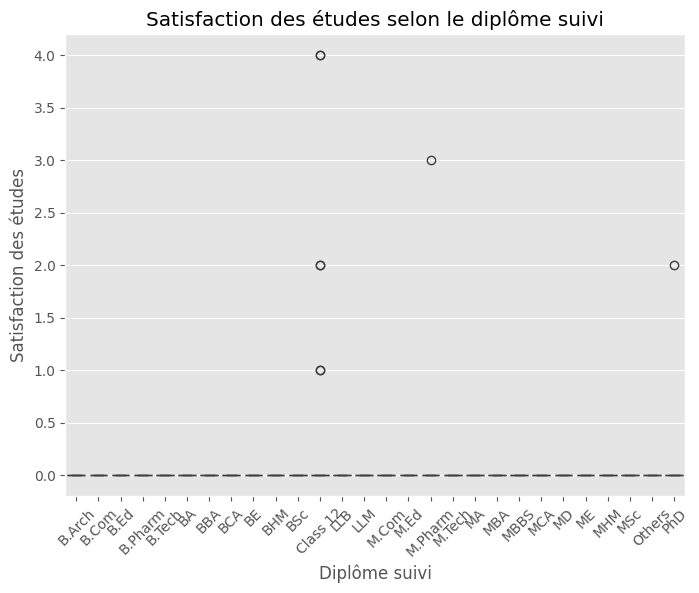

In [1127]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diplome_suivi', y=' satisfaction_travail', data=df, palette='Set1')
plt.title("Satisfaction des études selon le diplôme suivi")
plt.xlabel("Diplôme suivi")
plt.ylabel("Satisfaction des études")
plt.xticks(rotation=45)
plt.show()

#2eme étape : estimer les statistiques de base (mean, quantile, sd) par ss pop

In [1128]:
# Estimer la moyenne par groupe de 'depression'
mean_by_group_ = df.groupby('diplome_suivi')[' satisfaction_travail'].mean()

# Estimer l'écart-type (sd) par groupe de 'depression'
sd_by_group_ = df.groupby('diplome_suivi')['satisfaction_etudes'].std()

# Estimer les quantiles (par défaut, tous les quantiles de 0 à 1) par groupe de 'depression'
quantiles_by_group_ = df.groupby('diplome_suivi')[' satisfaction_travail'].quantile([0.25, 0.5, 0.75])

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\537627375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_group_ = df.groupby('diplome_suivi')[' satisfaction_travail'].mean()
C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\537627375.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sd_by_group_ = df.groupby('diplome_suivi')['satisfaction_etudes'].std()
C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\537627375.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

In [1129]:
# Afficher les résultats
print("Moyenne par groupe :")
mean_by_group_

Moyenne par groupe :


diplome_suivi
B.Arch      0.000000
B.Com       0.000000
B.Ed        0.000000
B.Pharm     0.000000
B.Tech      0.000000
BA          0.000000
BBA         0.000000
BCA         0.000000
BE          0.000000
BHM         0.000000
BSc         0.000000
Class 12    0.002303
LLB         0.000000
LLM         0.000000
M.Com       0.000000
M.Ed        0.000000
M.Pharm     0.005155
M.Tech      0.000000
MA          0.000000
MBA         0.000000
MBBS        0.000000
MCA         0.000000
MD          0.000000
ME          0.000000
MHM         0.000000
MSc         0.000000
Others      0.000000
PhD         0.003831
Name:  satisfaction_travail, dtype: float64

In [1130]:
print("\nÉcart-type par groupe :")
sd_by_group_


Écart-type par groupe :


diplome_suivi
B.Arch      1.354627
B.Com       1.313457
B.Ed        1.323866
B.Pharm     1.351468
B.Tech      1.323777
BA          1.394479
BBA         1.313250
BCA         1.347611
BE          1.315736
BHM         1.354182
BSc         1.398316
Class 12    1.376500
LLB         1.319849
LLM         1.341006
M.Com       1.363415
M.Ed        1.357633
M.Pharm     1.337204
M.Tech      1.363793
MA          1.360182
MBA         1.393077
MBBS        1.418580
MCA         1.376713
MD          1.354321
ME          1.327929
MHM         1.370657
MSc         1.381537
Others      1.336621
PhD         1.377108
Name: satisfaction_etudes, dtype: float64

In [1131]:
print("\nQuantiles par groupe :")
quantiles_by_group_ 


Quantiles par groupe :


diplome_suivi      
B.Arch         0.25    0.0
               0.50    0.0
               0.75    0.0
B.Com          0.25    0.0
               0.50    0.0
                      ... 
Others         0.50    0.0
               0.75    0.0
PhD            0.25    0.0
               0.50    0.0
               0.75    0.0
Name:  satisfaction_travail, Length: 84, dtype: float64

#3eme étape : tester la normalité des données dans chaque sous population

#𝐻0 ∶ la distribution suit une loi normale

#𝐻1 ∶ la distributionne suit pas une loi normale

In [1132]:
# Fonction pour appliquer le test de Shapiro-Wilk à chaque groupe
def shapiro_test_group(df, group_col, target_col):
    results = {}
    
    # Itérer sur les groupes de 'diplome_suivi'
    for group, group_data in df.groupby(group_col):
        x = group_data[target_col].dropna()  # Supprimer les valeurs manquantes
        
        # Vérifier si le groupe a plus de 5000 observations
        if len(x) > 5000:
            x = x.sample(5000, random_state=42)  # Prendre un échantillon de 5000 observations si plus de 5000
        
        # Vérifier si le groupe a suffisamment d'observations (>= 3)
        if len(x) >= 3:
            if len(x.unique()) > 1:  # Vérifier si les données sont différentes
                stat, p_value = shapiro(x)
                results[group] = p_value
            else:
                results[group] = None  # Retourner None si les données sont identiques
        else:
            results[group] = None  # Retourner None si le groupe a moins de 3 observations
    
    return results

# Appliquer la fonction au DataFrame
shapiro_results = shapiro_test_group(df, 'diplome_suivi', ' satisfaction_travail')


C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\2402484345.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, group_data in df.groupby(group_col):


In [1133]:
# Afficher les résultats
print(shapiro_results)

{'B.Arch': None, 'B.Com': None, 'B.Ed': None, 'B.Pharm': None, 'B.Tech': None, 'BA': None, 'BBA': None, 'BCA': None, 'BE': None, 'BHM': None, 'BSc': None, 'Class 12': 1.3802221331685923e-95, 'LLB': None, 'LLM': None, 'M.Com': None, 'M.Ed': None, 'M.Pharm': 4.1491208956630897e-47, 'M.Tech': None, 'MA': None, 'MBA': None, 'MBBS': None, 'MCA': None, 'MD': None, 'ME': None, 'MHM': None, 'MSc': None, 'Others': None, 'PhD': 3.481698302157731e-45}


#4eme étape : tester l’égalité des variances

#bartlett.test(df$satisfaction_travail~df$diplome_suivi) si normalité respectée

#Test de Levene pour l'égalité des variances (plus robuste)

In [1134]:
# Fonction pour appliquer le test de Levene
# Fonction pour appliquer le test de Levene avec centré sur la moyenne
def levene_test_group(df, group_col, target_col):
    # Diviser les données par groupes de 'diplome_suivi'
    groups = [group_data[target_col].dropna() for _, group_data in df.groupby(group_col)]
    
    # Appliquer le test de Levene avec centré sur la moyenne (par défaut) ou la médiane
    stat, p_value = levene(*groups, center='median')  # Centered on mean (comme dans R)
    
    return stat, p_value

# Appliquer la fonction au DataFrame
levene_stat, levene_p_value = levene_test_group(df, 'diplome_suivi', ' satisfaction_travail')

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\975358256.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group_data[target_col].dropna() for _, group_data in df.groupby(group_col)]


In [1135]:
# Afficher les résultats
print(f"Levene's test statistic: {levene_stat}")
print(f"P-value: {levene_p_value}")

Levene's test statistic: 0.7969946602044147
P-value: 0.7613407525182427


#5eme étape : tester la significativité du facteur: tester l’égalité des moyennes

In [1136]:
# Appliquer le test de Kruskal-Wallis
def kruskal_test(df, group_col, target_col):
    # Diviser les données en groupes basés sur 'diplome_suivi'
    groups = [group_data[target_col].dropna() for _, group_data in df.groupby(group_col)]
    
    # Effectuer le test de Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    
    return stat, p_value

# Appliquer la fonction au DataFrame
kruskal_stat, kruskal_p_value = kruskal_test(df, 'diplome_suivi', ' satisfaction_travail')

C:\Users\awx1347475\AppData\Local\Temp\ipykernel_43952\399544559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group_data[target_col].dropna() for _, group_data in df.groupby(group_col)]


In [1137]:
# Afficher les résultats
print(f"Kruskal-Wallis statistic: {kruskal_stat}")
print(f"P-value: {kruskal_p_value}")

Kruskal-Wallis statistic: 25.32725578247819
P-value: 0.5561277145169576


# B-4-1 La dépression est-elle indépendante des habitudes alimentaires ?

In [1138]:
# Créer un tableau de contingence
table_contingence = pd.crosstab(df['depression'], df['habitudes_alimentaires'])

# Transformer le tableau croisé en DataFrame
table_contingence = table_contingence.reset_index().melt(id_vars='depression', var_name='État de santé', value_name='Fréquence')

# Renommer les colonnes
table_contingence.rename(columns={'depression': 'Dépression'}, inplace=True)

# Afficher le tableau de contingence
print(table_contingence)

  Dépression État de santé  Fréquence
0        Non       Healthy       4177
1        Oui       Healthy       3472
2        Non      Moderate       4363
3        Oui      Moderate       5558
4        Non        Others          4
5        Oui        Others          8
6        Non     Unhealthy       3019
7        Oui     Unhealthy       7297


#1- Comparaison graphique

  depression État de santé  Fréquence
0        Non       Healthy       4177
1        Oui       Healthy       3472
2        Non      Moderate       4363
3        Oui      Moderate       5558
4        Non        Others          4
5        Oui        Others          8
6        Non     Unhealthy       3019
7        Oui     Unhealthy       7297


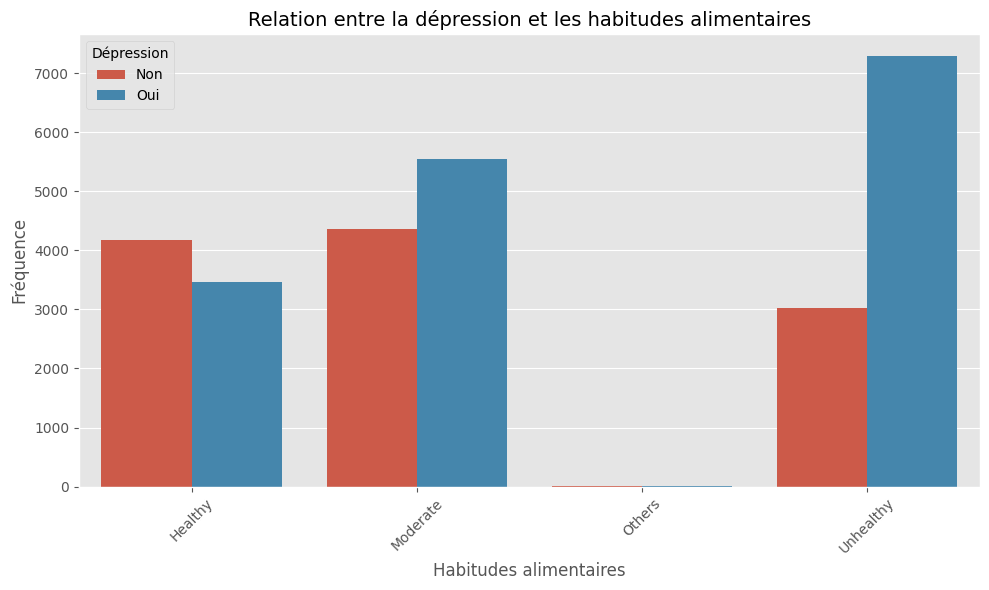

In [1139]:
# Créer un tableau de contingence
table_contingence = pd.crosstab(df['depression'], df['habitudes_alimentaires']).reset_index()
table_contingence = table_contingence.melt(id_vars='depression', var_name='État de santé', value_name='Fréquence')

# Afficher le tableau
print(table_contingence)

# Créer le graphique (Diagramme en barres)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=table_contingence,
    x='État de santé', 
    y='Fréquence', 
    hue='depression', 
    dodge=True
)

# Ajouter les étiquettes et le titre
plt.xlabel('Habitudes alimentaires', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Relation entre la dépression et les habitudes alimentaires', fontsize=14)
plt.legend(title='Dépression')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

#2- Vérification de la condition de Cochran

In [1140]:
# Créer le tableau de contingence
table_contingence = pd.crosstab(df['depression'], df['habitudes_alimentaires'])

# Afficher le tableau de contingence original
print("Tableau de contingence :")
print(table_contingence)

# Appliquer le test du chi-carré pour obtenir les effectifs théoriques
chi2, p, dof, expected = chi2_contingency(table_contingence)

# Afficher les effectifs théoriques
print("\nEffectifs théoriques :")
print(expected)

# Vérifier la condition de Cochran : au moins 80% des effectifs théoriques doivent être supérieurs à 5
condition_cochran_respectee = (expected > 5).mean() >= 0.8

print("\nLa condition de Cochran est respectée :", condition_cochran_respectee)

Tableau de contingence :
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
depression                                                  
Non                        4177      4363       4       3019
Oui                        3472      5558       8       7297

Effectifs théoriques :
[[3.17031282e+03 4.11199810e+03 4.97368987e+00 4.27571539e+03]
 [4.47868718e+03 5.80900190e+03 7.02631013e+00 6.04028461e+03]]

La condition de Cochran est respectée : True


#3 - Test de liaison de Khi-2

In [1141]:
# Afficher les résultats
print("\nRésultats du test du chi-carré :")
print(f"Statistique du chi-carré : {chi2}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p}")

# Afficher les effectifs théoriques
print("\nEffectifs théoriques :")
print(expected)

# Interprétation de la p-value
if p < 0.05:
    print("\nLe test est significatif, il y a une association entre 'depression' et 'habitudes_alimentaires'.")
else:
    print("\nLe test n'est pas significatif, il n'y a pas d'association entre 'depression' et 'habitudes_alimentaires'.")


Résultats du test du chi-carré :
Statistique du chi-carré : 1203.26724929502
Degrés de liberté : 3
p-value : 1.4332378809995893e-260

Effectifs théoriques :
[[3.17031282e+03 4.11199810e+03 4.97368987e+00 4.27571539e+03]
 [4.47868718e+03 5.80900190e+03 7.02631013e+00 6.04028461e+03]]

Le test est significatif, il y a une association entre 'depression' et 'habitudes_alimentaires'.


# B-4-2 La durée du sommeil est-elle indépendante de la dépression ?

In [1142]:
# Créer un tableau de contingence
table_cont = pd.crosstab(df['depression'], df['duree_sommeil'])

# Afficher le tableau de contingence
table_cont

duree_sommeil,5-6 hours,7-8 hours,Less than 5 hours,More than 8 hours,Others
depression,,,,,
Non,2665,2975,2948,2966,9
Oui,3516,4371,5361,3078,9


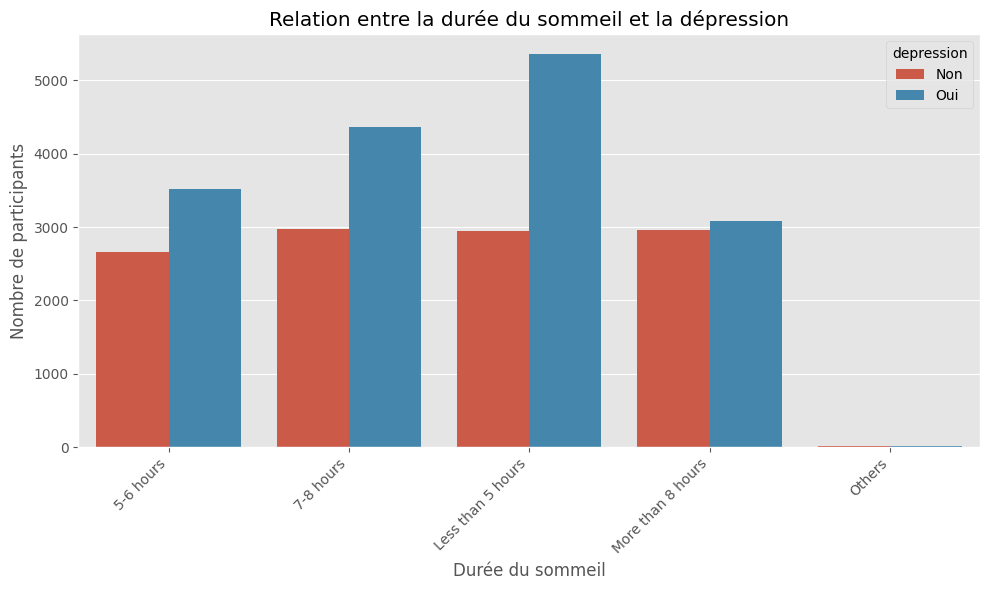

In [1143]:
# Supposons que df est déjà défini, et que "duree_sommeil" et "depression" sont des colonnes de df
plt.figure(figsize=(10, 6))

# Créer le graphique
sns.countplot(data=df, x='duree_sommeil', hue='depression', dodge=True)

# Ajouter des labels et un titre
plt.xlabel('Durée du sommeil')
plt.ylabel('Nombre de participants')
plt.title('Relation entre la durée du sommeil et la dépression')

# Rotation des labels sur l'axe X
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [1144]:
# 2-a Créer un tableau de contingence entre la durée du sommeil et la dépression
#table_contingence = pd.crosstab(df['duree_sommeil'], df['depression'])

# 2-b Calculer les effectifs théoriques
chi2_result = stats.chi2_contingency(table_cont)

# 2-c Récupérer les effectifs théoriques
theoretical_counts = chi2_result[0]
print("Effectifs théoriques :")
theoretical_counts


Effectifs théoriques :


277.13495443548004

In [1145]:
# 2-d Effectuer un test du chi-carré
p_value = chi2_result[1]
print("Résultat du test du chi-carré:")
chi2_result

Résultat du test du chi-carré:


Chi2ContingencyResult(statistic=277.13495443548004, pvalue=9.240458086403438e-59, dof=4, expected_freq=array([[2561.86475733, 3044.7271489 , 3443.86576099, 2505.08179798,
           7.46053481],
       [3619.13524267, 4301.2728511 , 4865.13423901, 3538.91820202,
          10.53946519]]))

In [1146]:
# Conclusion basée sur la p-value
if p_value < 0.05:
    print(f"La durée du sommeil est significativement liée à la dépression (p = {p_value:.4f}).")
else:
    print(f"La durée du sommeil n'est pas significativement liée à la dépression (p = {p_value:.4f}).")

La durée du sommeil est significativement liée à la dépression (p = 0.0000).
